# Ticketmaster API Project

Using the Discovery API of the Ticketmaster website, we managed to get the information about the events of Berlin and Toulouse.
These data were saved in a csv file.

In [1]:
import pandas as pd
import json
url = "~/Desktop/DATA_FT_May_2025/Week 3/data_events.csv"

#Creating a DataFrame from the csv file:
df_events = pd.read_csv(url)
df_events.head(3)

,Unnamed: 0,name,description,url,locale,timezone,date,time,segment,genre,subgenre,venue,city,country,address,upcoming_events
0,0,15 000 voix pour les legendes du rock,en tournée à partir de 2026vivez une expérienc...,https://www.ticketmaster.fr/fr/manifestation/1...,fr-fr,Europe/Paris,2026-06-05,20:00:00,Music,Rock,Pop,zenith toulouse metropole,Toulouse,France,11 avenue raymond badiou,111
1,1,dirty dancing - l'ecran pop cinéma-karaoké:dir...,tal ticket présente : l'ecran pop cinéma-karao...,https://www.ticketmaster.fr/fr/manifestation/d...,fr-fr,Europe/Paris,2025-06-06,20:00:00,Film,Music,Music,cinema pathe wilson,Toulouse,France,3 pl. du président thomas wilson,2
2,2,mamma mia ! - l'ecran pop cinéma-karaoké : mam...,tal ticket présente : l'ecran pop cinéma-karao...,https://www.ticketmaster.fr/fr/manifestation/m...,fr-fr,Europe/Paris,2025-09-25,20:00:00,Film,Music,Music,cinema pathe wilson,Toulouse,France,3 pl. du président thomas wilson,2


In [2]:
# Erasing the duplicated index column:
df_events.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
# Checking the structure of the dataframe:
df_events.head(3)

,name,description,url,locale,timezone,date,time,segment,genre,subgenre,venue,city,country,address,upcoming_events
0,15 000 voix pour les legendes du rock,en tournée à partir de 2026vivez une expérienc...,https://www.ticketmaster.fr/fr/manifestation/1...,fr-fr,Europe/Paris,2026-06-05,20:00:00,Music,Rock,Pop,zenith toulouse metropole,Toulouse,France,11 avenue raymond badiou,111
1,dirty dancing - l'ecran pop cinéma-karaoké:dir...,tal ticket présente : l'ecran pop cinéma-karao...,https://www.ticketmaster.fr/fr/manifestation/d...,fr-fr,Europe/Paris,2025-06-06,20:00:00,Film,Music,Music,cinema pathe wilson,Toulouse,France,3 pl. du président thomas wilson,2
2,mamma mia ! - l'ecran pop cinéma-karaoké : mam...,tal ticket présente : l'ecran pop cinéma-karao...,https://www.ticketmaster.fr/fr/manifestation/m...,fr-fr,Europe/Paris,2025-09-25,20:00:00,Film,Music,Music,cinema pathe wilson,Toulouse,France,3 pl. du président thomas wilson,2


In [4]:
# Checking the columns of the dataframe:
df_events.columns

Index(['name', 'description', 'url', 'locale', 'timezone', 'date', 'time',
       'segment', 'genre', 'subgenre', 'venue', 'city', 'country', 'address',
       'upcoming_events'],
      dtype='object')

In [6]:
# Checking the amount of unique values for each dimension:
df_events.nunique()

name               362
description        122
url                384
locale               2
timezone             2
date               216
time                15
segment              4
genre               20
subgenre            29
venue               18
city                 2
country              2
address             43
upcoming_events     25
dtype: int64

In [6]:
df_events['time'].value_counts()

time
20:00:00    255
19:30:00     34
19:00:00     32
20:30:00     31
18:00:00     11
17:00:00      7
19:45:00      6
15:00:00      3
18:30:00      2
17:30:00      2
15:30:00      2
16:00:00      1
21:00:00      1
23:00:00      1
10:00:00      1
Name: count, dtype: int64

In [7]:
# Verifying segment's values:
df_events["segment"].unique()


array(['Music', 'Film', 'Arts & Theatre', 'Miscellaneous'], dtype=object)

In [8]:
# Proportion of events for each segment:
df_events["segment"].value_counts()

segment
Music             370
Film               12
Arts & Theatre     10
Miscellaneous       1
Name: count, dtype: int64

In [ ]:
# Types of genre:
df_events["genre"].unique()

array(['Rock', 'Music', "Children's Music", 'Pop', 'Metal',
       'Chanson Francaise', 'R&B', 'Jazz', 'Hip-Hop/Rap',
       'Dance/Electronic', 'Undefined', 'Religious', 'World',
       'Alternative', 'Folk', 'Spectacular', 'Theatre', 'Classical',
       'Other', 'Family'], dtype=object)

In [9]:
# Number of events of each genre:
df_events["genre"].value_counts()

genre
Rock                 169
Hip-Hop/Rap           60
Chanson Francaise     50
Alternative           17
Pop                   13
Dance/Electronic      12
Music                 12
Children's Music      11
Classical             11
Metal                  9
World                  7
Undefined              6
Jazz                   4
Folk                   4
R&B                    2
Other                  2
Religious              1
Spectacular            1
Theatre                1
Family                 1
Name: count, dtype: int64

In [10]:
# Types of subgenre:
df_events["subgenre"].unique()

array(['Pop', 'Music', "Children's Music", 'Adult Contemporary', 'Metal',
       'Chanson Francaise', 'R&B', 'Jazz', 'Hip-Hop/Rap',
       'Dance/Electronic', 'Undefined', 'Gospel', 'World', 'Hard Rock',
       'Heavy Metal', 'Alternative Rock', 'Alternative', 'Indie Rock',
       'Indie Pop', 'Pop Rock', 'Urban', 'Folk', 'Spectacular',
       'Miscellaneous', 'Classical/Vocal', 'Folk Rock', 'Soul', 'Other',
       'Europe'], dtype=object)

In [11]:
# Number of events of each subgenre:
df_events["subgenre"].value_counts()

subgenre
Pop                   167
Hip-Hop/Rap            59
Chanson Francaise      50
Alternative Rock       14
Dance/Electronic       12
Music                  12
Children's Music       11
Classical/Vocal        11
Hard Rock               8
Metal                   8
Indie Pop               6
Europe                  6
Undefined               6
Jazz                    4
Other                   3
Folk                    3
World                   1
Spectacular             1
Soul                    1
Folk Rock               1
Adult Contemporary      1
Miscellaneous           1
Urban                   1
Gospel                  1
Pop Rock                1
R&B                     1
Indie Rock              1
Alternative             1
Heavy Metal             1
Name: count, dtype: int64

In [13]:
# Number of venues:
df_events["venue"].nunique()

18

In [14]:
# Number of events for each venue:
df_events["venue"].value_counts()

venue
uber arena                         87
zenith toulouse metropole          62
casino - barriere                  26
uber eats music hall               18
la cabane                          14
le rex de toulouse                 14
tempodrom                           6
le metronum                         5
prairie des filtres                 5
columbia theater                    5
lark                                2
comedie de la roseraie              2
cinema pathe wilson                 2
halle aux grains                    2
halle de la machine                 1
festsaal kreuzberg - biergarten     1
dstrkt                              1
flughafen tempelhof                 1
Name: count, dtype: int64

In [17]:
# df_events.loc[df_events["venue"] == "zenith toulouse metropole"]

## **Events per city**

In [18]:
import seaborn as sns

*Plotting a graph to visualize the count of events at both cities:*

<Axes: xlabel='city', ylabel='count'>

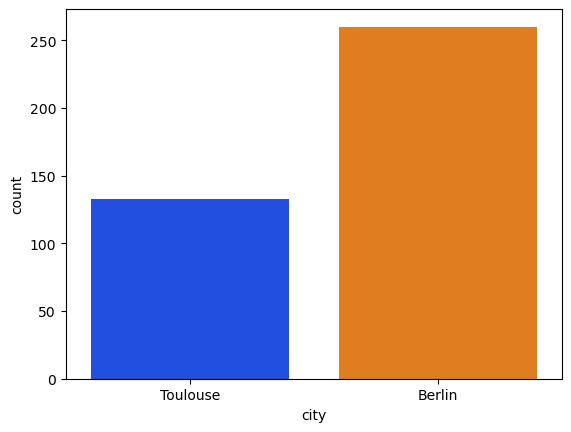

In [121]:
sns.countplot(x='city', data=df_events, hue='city', palette='bright')

*Let's check how the amount of events for each city and its populations relate:*

Berlin Population: 3.432 million (Dec 31, 2023)

Toulouse Population: 511 684 (Dec 19, 2024)


In [80]:
# Defining population variables:
berlin_pop = 3432000
toulouse_pop = 511684

#Number of events for each city:
berlin_events = 260
toulouse_events = 133

#Population/event rate for each city:
pop_event_rate_toulouse = round((toulouse_pop/toulouse_events), None)
pop_event_rate_berlin = round((berlin_pop/berlin_events), None)


In [81]:
#Transforming the data into a dataframe:
pop_event_rates = [pop_event_rate_toulouse, pop_event_rate_berlin]
df_pop_event = pd.DataFrame(pop_event_rates, index=["Toulouse", "Berlin"], columns=["population_event_rate"])
df_pop_event

,population_event_rate
Toulouse,3847
Berlin,13200


*Now let's see how the events are divided regarding their start time:*

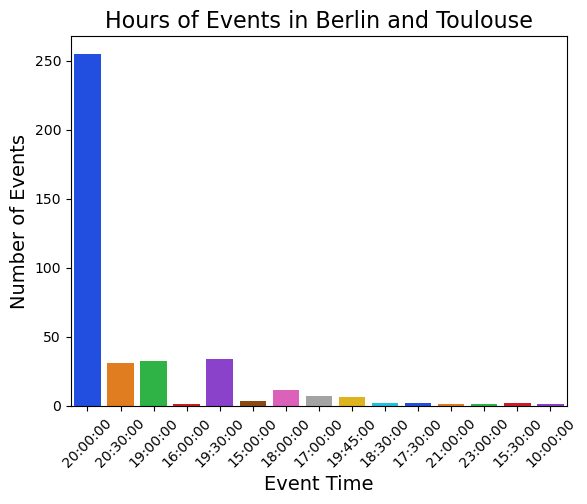

In [ ]:
import matplotlib.pyplot as plt
events_times = sns.countplot(x='time', data=df_events, hue='time', palette='bright')
events_times.tick_params(axis='x', labelrotation = 45)
plt.title('Hours of Events in Berlin and Toulouse', fontsize=16)
plt.xlabel('Event Time', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend('',frameon=False)
plt.show()


*And now regarding the venues of the events:*

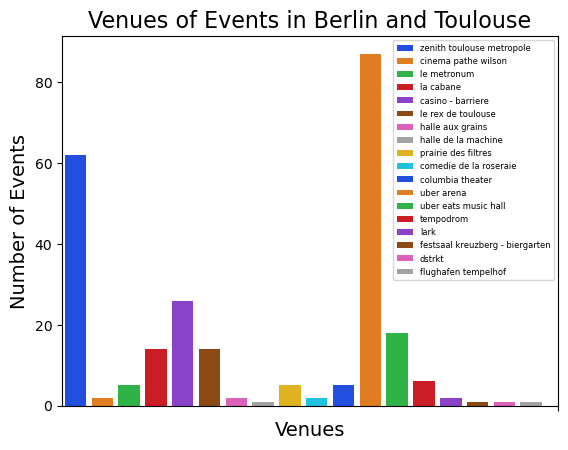

In [140]:
events_venues = sns.countplot(x="venue", data=df_events, hue='venue', palette='bright')
events_venues.tick_params(axis='x', labelrotation = 60)
plt.title('Venues of Events in Berlin and Toulouse', fontsize=16)
plt.xlabel('Venues', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks('')
plt.yticks(fontsize=10)
plt.legend(fontsize=6)
plt.show()

*Selecting the 6 venues with more upcoming events:*

In [57]:
venue_list= ["uber arena","zenith toulouse metropole", "casino - barriere", "uber eats music hall","la cabane", "le rex de toulouse"]
event_venue_list= [87, 62, 26, 18,14, 14]
df_venues = pd.DataFrame(data=event_venue_list, index = venue_list)

df_venues.reset_index(inplace=True)
df_venues.columns= ["venue", "events"]
df_venues

,venue,events
0,uber arena,87
1,zenith toulouse metropole,62
2,casino - barriere,26
3,uber eats music hall,18
4,la cabane,14
5,le rex de toulouse,14


*Verifying the capacities for each venue and creating a dataframe:*

In [82]:
capacities = [17000, 11000, 1200, 4350, 750, 400]
capacities_series = pd.Series(data=capacities)
df_venues_2 = pd.concat([df_venues, capacities_series], axis=1)
df_venues_2.columns= ["venue", "events", "venue_capacity"]
df_venues_2

,venue,events,venue_capacity
0,uber arena,87,17000
1,zenith toulouse metropole,62,11000
2,casino - barriere,26,1200
3,uber eats music hall,18,4350
4,la cabane,14,750
5,le rex de toulouse,14,400
